# Probabilistic Machine Learning
## AI Saturdays
### [Neil D. Lawrence](http://inverseprobability.com), Amazon Cambridge and University of Sheffield
### 2018-08-25

**Abstract**: In this session we review the *probabilistic* approach to machine learning.
We start with a review of probability, and introduce the concepts of
probabilistic modelling. We then apply the approach in practice to Naive
Bayesian classification. In this lecture we review the Bayesian
formalism in the context of linear models, reviewing initially maximum
likelihood and introducing basis functions as a way of driving
non-linearity in the model.

$$\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
% Already defined by latex
%\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
% Already defined by latex
%\newcommand{\vec}{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}$$

## What is Machine Learning?

What is machine learning? At its most basic level machine learning is a
combination of

$$ \text{data} + \text{model} \xrightarrow{\text{compute}} \text{prediction}$$

where *data* is our observations. They can be actively or passively
acquired (meta-data). The *model* contains our assumptions, based on
previous experience. That experience can be other data, it can come from
transfer learning, or it can merely be our beliefs about the
regularities of the universe. In humans our models include our inductive
biases. The *prediction* is an action to be taken or a categorization or
a quality score. The reason that machine learning has become a mainstay
of artificial intelligence is the importance of predictions in
artificial intelligence. The data and the model are combined through
computation.

In practice we normally perform machine learning using two functions. To
combine data with a model we typically make use of:

**a prediction function** a function which is used to make the
predictions. It includes our beliefs about the regularities of the
universe, our assumptions about how the world works, e.g. smoothness,
spatial similarities, temporal similarities.

**an objective function** a function which defines the cost of
misprediction. Typically it includes knowledge about the world's
generating processes (probabilistic objectives) or the costs we pay for
mispredictions (empiricial risk minimization).

The combination of data and model through the prediction function and
the objectie function leads to a *learning algorithm*. The class of
prediction functions and objective functions we can make use of is
restricted by the algorithms they lead to. If the prediction function or
the objective function are too complex, then it can be difficult to find
an appropriate learning algorithm. Much of the acdemic field of machine
learning is the quest for new learning algorithms that allow us to bring
different types of models and data together.

A useful reference for state of the art in machine learning is the UK
Royal Society Report, [Machine Learning: Power and Promise of Computers
that Learn by
Example](https://royalsociety.org/~/media/policy/projects/machine-learning/publications/machine-learning-report.pdf).

You can also check my blog post on ["What is Machine
Learning?"](http://inverseprobability.com/2017/07/17/what-is-machine-learning)

## Probabilities

We are now going to do some simple review of probabilities and use this
review to explore some aspects of our data.

A probability distribution expresses uncertainty about the outcome of an
event. We often encode this uncertainty in a variable. So if we are
considering the outcome of an event, $Y$, to be a coin toss, then we
might consider $Y=1$ to be heads and $Y=0$ to be tails. We represent the
probability of a given outcome with the notation: 
$$
P(Y=1) = 0.5
$$ 
The first rule of probability is that the probability must normalize.
The sum of the probability of all events must equal 1. So if the
probability of heads ($Y=1$) is 0.5, then the probability of tails (the
only other possible outcome) is given by 
$$
P(Y=0) = 1-P(Y=1) = 0.5
$$

Probabilities are often defined as the limit of the ratio between the
number of positive outcomes (e.g. *heads*) given the number of trials.
If the number of positive outcomes for event $y$ is denoted by $n$ and
the number of trials is denoted by $N$ then this gives the ratio 
$$
P(Y=y) = \lim_{N\rightarrow \infty}\frac{n_y}{N}.
$$ 
In practice we never get to observe an event infinite times, so
rather than considering this we often use the following estimate 
$$
P(Y=y) \approx \frac{n_y}{N}.
$$ 

### Movie Body Count Data

To explore probabilities, we'll load in a data set. 

There is a crisis in the movie industry, deaths are
occuring on a massive scale. In every feature film the body count is tolling up.
But what is the cause of all these deaths? Let's try and investigate.}

\notes{For our first example of data science, we take inspiration from work by [researchers at NJIT](http://www.theswarmlab.com/r-vs-python-round-2/). They researchers were comparing the qualities of Python with R (my brief thoughts on the subject are available in a Google+ post here: https://plus.google.com/116220678599902155344/posts/5iKyqcrNN68). They put together a data base of results from the  the "Internet Movie Database" and the [Movie Body Count](http://www.moviebodycounts.com/) website which will allow us to do some preliminary investigation.}

\notes{We will make use of data that has already been 'scraped' from the [Movie Body Count](http://www.moviebodycounts.com/) website. Code and the data is available at [a github repository](https://github.com/sjmgarnier/R-vs-
Python/tree/master/Deadliest%20movies%20scrape/code). Git is a version control
system and github is a website that hosts code that can be accessed through git.
By sharing the code publicly through github, the authors are licensing the code
publicly and allowing you to access and edit it. As well as accessing the code
via github you can also [download the zip file](https://github.com/sjmgarnier/R-vs-Python/archive/master.zip).

For ease of use we've packaged this data set in the ```pods``` library

### ```pods```

The ```pods``` library is a library for supporting open data science (python open data science). It allows you to load in various data sets and provides tools for helping teach in the notebook.

To install pods you can use pip:

```pip install pods```

The code is also available on github: <https://github.com/sods/ods>

Once ```pods``` is installed, it can be imported in the usual manner.

In [39]:
import pods

In [40]:
data = pods.datasets.movie_body_count()['Y']
data.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,"[Biography, Comedy, Drama, Music]",[Michael Winterbottom],"[Steve Coogan, John Thomson, Paul Popplewell, ...",117,7.4
1,3:10 to Yuma,2007,45,R,"[Adventure, Crime, Drama, Western]",[James Mangold],"[Russell Crowe, Christian Bale, Logan Lerman, ...",122,7.8
2,300,2006,0,R,"[Action, Fantasy, History, War]",[Zack Snyder],"[Gerard Butler, Lena Headey, Dominic West, Dav...",117,7.8
3,8MM,1999,7,R,"[Crime, Mystery, Thriller]",[Joel Schumacher],"[Nicolas Cage, Joaquin Phoenix, James Gandolfi...",123,6.4
4,The Abominable Dr. Phibes,1971,10,PG-13,"[Fantasy, Horror]",[Robert Fuest],"[Vincent Price, Joseph Cotten, Hugh Griffith, ...",94,7.2


Once it is loaded in the data can be summarized using the `describe` method in pandas.

In [41]:
data.describe()

,Year,Body_Count,Length_Minutes,IMDB_Rating
count,421.000000,421.000000,421.000000,421.000000
mean,1996.491686,53.287411,115.427553,6.882898
std,10.913210,82.068035,21.652287,1.110788
min,1949.000000,0.000000,79.000000,2.000000
25%,1991.000000,11.000000,100.000000,6.200000
50%,2000.000000,28.000000,111.000000,6.900000
75%,2005.000000,61.000000,127.000000,7.700000
max,2009.000000,836.000000,201.000000,9.300000


In jupyter and jupyter notebook it is possible to see a list of all possible
functions and attributes by typing the name of the object followed by .<Tab> for
example in the above case if we type data.<Tab> it show the columns
available (these are attributes in pandas dataframes) such as Body_Count, and
also functions, such as .describe().

For functions we can also see the
documentation about the function by following the name with a question mark.
This will open a box with documentation at the bottom which can be closed with
the x button.

In [ ]:
data.describe?

The film deaths data is stored in an object known as a 'data frame'. Data frames
come from the statistical family of programming languages based on `S`, the most
widely used of which is
[`R`](http://en.wikipedia.org/wiki/R_(programming_language)). The data frame
gives us a convenient object for manipulating data. The describe method
summarizes which columns there are in the data frame and gives us counts, means,
standard deviations and percentiles for the values in those columns. To access a
column directly we can write

In [42]:
print(data['Year'])
#print(data['Body_Count'])

0      2002
1      2007
2      2006
3      1999
4      1971
5      1988
6      1988
7      1990
8      2005
9      1988
10     2002
11     1979
12     2007
13     2006
14     1980
15     2007
16     1985
17     1981
18     2000
19     1993
20     1998
21     1979
22     2006
23     2008
24     1998
25     1992
26     1976
27     2005
28     2007
29     2002
       ... 
391    1995
392    2005
393    2008
394    2005
395    2000
396    1983
397    1985
398    2006
399    2007
400    2004
401    2007
402    2008
403    2005
404    2001
405    2000
406    2002
407    1968
408    1969
409    2000
410    2003
411    2006
412    2002
413    2005
414    1974
415    2000
416    2007
417    1967
418    2007
419    2001
420    1964
Name: Year, Length: 421, dtype: int64


This shows the number of deaths per film across the years. We can plot the data as follows.

In [43]:
# this ensures the plot appears in the web browser
%matplotlib inline 
import matplotlib.pyplot as plt # this imports the plotting library in python}

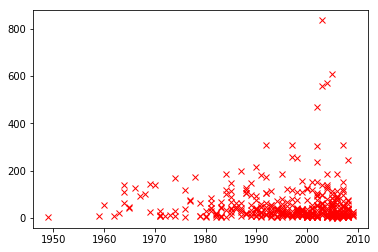

In [44]:
plt.plot(data['Year'], data['Body_Count'], 'rx')

You may be curious what the arguments we give to plt.plot are for, now is the perfect time to look at the documentation

In [ ]:
plt.plot?

We immediately note that some films have a lot of deaths, which prevent us seeing the detail of the main body of films. First lets identify the films with the most deaths.

In [45]:
data[data['Body_Count']>200]

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
60,Dip huet gaai tau,1990,214,NaN,"[Crime, Drama, Thriller]",[John Woo],"[Tony Leung Chiu Wai, Jacky Cheung, Waise Lee,...",136,7.7
117,Equilibrium,2002,236,R,"[Action, Drama, Sci-Fi, Thriller]",[Kurt Wimmer],"[Christian Bale, Dominic Purcell, Sean Bean, C...",107,7.6
154,Grindhouse,2007,310,R,"[Action, Horror, Thriller]","[Robert Rodriguez, Eli Roth, Quentin Tarantino...","[Kurt Russell, Zoë Bell, Rosario Dawson, Vanes...",191,7.7
159,Lat sau san taam,1992,307,R,"[Action, Crime, Drama, Thriller]",[John Woo],"[Yun-Fat Chow, Tony Leung Chiu Wai, Teresa Mo,...",128,8.0
193,Kingdom of Heaven,2005,610,R,"[Action, Adventure, Drama, History, War]",[Ridley Scott],"[Martin Hancock, Michael Sheen, Nathalie Cox, ...",144,7.2
206,The Last Samurai,2003,558,R,"[Action, Drama, History, War]",[Edward Zwick],"[Ken Watanabe, Tom Cruise, William Atherton, C...",154,7.7
222,The Lord of the Rings: The Two Towers,2002,468,PG-13,"[Action, Adventure, Fantasy]",[Peter Jackson],"[Bruce Allpress, Sean Astin, John Bach, Sala B...",179,8.8
223,The Lord of the Rings: The Return of the King,2003,836,PG-13,"[Action, Adventure, Fantasy]",[Peter Jackson],"[Noel Appleby, Alexandra Astin, Sean Astin, Da...",201,8.9
291,Rambo,2008,247,R,"[Action, Thriller, War]",[Sylvester Stallone],"[Sylvester Stallone, Julie Benz, Matthew Marsd...",92,7.1
317,Saving Private Ryan,1998,255,R,"[Action, Drama, War]",[Steven Spielberg],"[Tom Hanks, Tom Sizemore, Edward Burns, Barry ...",169,8.6


Here we are using the command `data['Kill_Count']>200` to index the films in the pandas data frame which have over 200 deaths. To sort them in order we can also use the `sort` command. The result of this command on its own is a data series of `True` and `False` values. However, when it is passed to the
`data` data frame it returns a new data frame which contains only those
values for which the data series is `True`. We can also sort the result. To sort
the result by the values in the `Kill_Count` column in *descending* order we use
the following command.

In [ ]:
data[data['Body_Count']>200].sort_values(by='Body_Count', ascending=False)

We now see that the 'Lord of the Rings' is a large outlier with a very large number of kills. We can try and determine how much of an outlier by histograming the data.

### Plotting the Data

Text(0.5,1,'Histogram of Film Kill Count')

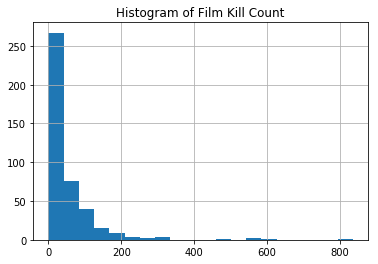

In [46]:
data['Body_Count'].hist(bins=20) # histogram the data with 20 bins.
plt.title('Histogram of Film Kill Count')

### Exercise

Read on the internet about the following python
libraries: `numpy`, `matplotlib`, `scipy` and `pandas`. What functionality does
each provide python. What is the `pylab` library and how does it relate to the
other libraries?

We could try and remove these outliers, but another approach would be plot the logarithm of the counts against the year.

Text(0.5,0,'year')

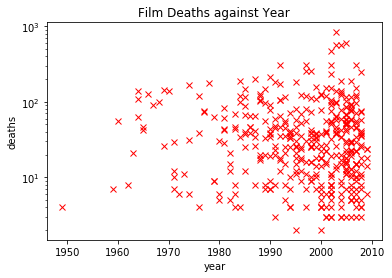

In [47]:
plt.plot(data['Year'], data['Body_Count'], 'rx')
ax = plt.gca() # obtain a handle to the current axis
ax.set_yscale('log') # use a logarithmic death scale
# give the plot some titles and labels
plt.title('Film Deaths against Year')
plt.ylabel('deaths')
plt.xlabel('year')

Note a few things. We are interacting with our data. In particular, we are
replotting the data according to what we have learned so far. We are using the
progamming language as a *scripting* language to give the computer one command
or another, and then the next command we enter is dependent on the result of the
previous. This is a very different paradigm to classical software engineering.
In classical software engineering we normally write many lines of code (entire
object classes or functions) before compiling the code and running it. Our
approach is more similar to the approach we take whilst debugging. Historically,
researchers interacted with data using a *console*. A command line window which
allowed command entry. The notebook format we are using is slightly different.
Each of the code entry boxes acts like a separate console window. We can move up
and down the notebook and run each part in a different order. The *state* of the
program is always as we left it after running the previous part.

### Back to Probability

Let's use the sum rule to compute the approximate probability that a
film from the movie body count website has over 40 deaths.

In [ ]:
deaths = (data.Body_Count>40).sum()  # number of positive outcomes (in sum True counts as 1, False counts as 0)
total_films = data.Body_Count.count()

prob_death = float(deaths)/float(total_films)
print("Probability of deaths being greather than 40 is:", prob_death)

### Question 

We now have an estimate of the probability a film has greater than 40
deaths. The estimate seems quite high. What could be wrong with the
estimate? Do you think any film you go to in the cinema has this
probability of having greater than 40 deaths?

Why did we have to use `float` around our counts of deaths and total
films? What would the answer have been if we hadn't used the `float`
command? If we were using Python 3 would we have this problem?

### Write your answer to Question here

## Conditioning

When predicting whether a coin turns up head or tails, we might think
that this event is *independent* of the year or time of day. If we
include an observation such as time, then in a probability this is known
as *condtioning*. We use this notation, $P(Y=y|T=t)$, to condition the
outcome on a second variable (in this case time). Or, often, for a
shorthand we use $P(y|t)$ to represent this distribution (the $Y=$ and
$T=$ being implicit). Because we don't believe a coin toss depends on
time then we might write that $$
P(y|t) =
p(y).
$$ However, we might believe that the number of deaths is dependent on
the year. For this we can try estimating $P(Y>40 | T=2000)$ and compare
the result, for example to $P(Y>40|2002)$ using our empirical estimate
of the probability.

In [ ]:
for year in [2000, 2002]:
    deaths = (data.Body_Count[data.Year==year]>40).sum()
    total_films = (data.Year==year).sum()

    prob_death = float(deaths)/float(total_films)
    print("Probability of deaths being greather than 40 in year", year, "is:", prob_death)

### Exercise

Compute the probability for the number of deaths being over 40 for each
year we have in our `film_deaths` data frame. Store the result in a
`numpy` array and plot the probabilities against the years using the
`plot` command from `matplotlib`. Do you think the estimate we have
created of $P(y|t)$ is a good estimate? Write your code and your written
answers in the box below.



In [ ]:
# Write your answer to Question 5 here

#### Exercise Answer Text

Write your answer to the question in this box.

#### Notes for Exercise

Make sure the plot is included in *this* notebook file (the `IPython`
magic command `%matplotlib inline` we ran above will do that for you, it
only needs to be run once per file).

  

Terminology |  Mathematical notation |  Description
------------|-----------------------|----------------------------------
joint      |   $P(X=x, Y=y)$        | prob. that X=x *and* Y=y
marginal   |   $P(X=x)$             | prob. that X=x *regardless of* Y
conditional|   $P(X=x\vert Y=y)$    | prob. that X=x *given that* Y=y

<center>
The different basic probability distributions.
</center>

### A Pictorial Definition of Probability

<img src="../slides/diagrams/mlai/prob_diagram.svg" align="">

Inspired by lectures from Christopher Bishop

### Definition of probability distributions.

Terminology       |              Definition                  |      Probability Notation
------------------|------------------------------------------|------------------------------
Joint Probability | $\lim_{N\rightarrow\infty}\frac{n_{X=3,Y=4}}{N}$ | $P\left(X=3,Y=4\right)$ 
Marginal Probability |  $\lim_{N\rightarrow\infty}\frac{n_{X=5}}{N}$ | $P\left(X=5\right)$
Conditional Probability | $\lim_{N\rightarrow\infty}\frac{n_{X=3,Y=4}}{n_{Y=4}}$ | $P\left(X=3\vert Y=4\right)$

### Notational Details

Typically we should write out $P\left(X=x,Y=y\right)$, but in practice
we often shorten this to $P\left(x,y\right)$. This looks very much like
we might write a multivariate function, *e.g.* $$
  f\left(x,y\right)=\frac{x}{y},
  $$ but for a multivariate function $$
f\left(x,y\right)\neq f\left(y,x\right).
$$ However, $$
P\left(x,y\right)=P\left(y,x\right)
$$ because $$
P\left(X=x,Y=y\right)=P\left(Y=y,X=x\right).
$$ Sometimes I think of this as akin to the way in Python we can write
'keyword arguments' in functions. If we use keyword arguments, the
ordering of arguments doesn't matter.

We've now introduced conditioning and independence to the notion of
probability and computed some conditional probabilities on a practical
example The scatter plot of deaths vs year that we created above can be
seen as a *joint* probability distribution. We represent a joint
probability using the notation $P(Y=y, T=t)$ or $P(y, t)$ for short.
Computing a joint probability is equivalent to answering the
simultaneous questions, what's the probability that the number of deaths
was over 40 and the year was 2002? Or any other question that may occur
to us. Again we can easily use pandas to ask such questions.

In [ ]:
year = 2000
deaths = (data.Body_Count[data.Year==year]>40).sum()
total_films = data.Body_Count.count() # this is total number of films
prob_death = float(deaths)/float(total_films)
print("Probability of deaths being greather than 40 and year being", year, "is:", prob_death)

### The Product Rule

This number is the joint probability, $P(Y, T)$ which is much *smaller*
than the conditional probability. The number can never be bigger than
the conditional probabililty because it is computed using the *product
rule*. $$
p(Y=y, X=x) = p(Y=y|X=x)p(X=x)
$$ and $$p(X=x)$$ is a probability distribution, which is equal or less
than 1, ensuring the joint distribution is typically smaller than the
conditional distribution.

The product rule is a *fundamental* rule of probability, and you must
remember it! It gives the relationship between the two questions: 1)
What's the probability that a film was made in 2002 and has over 40
deaths? and 2) What's the probability that a film has over 40 deaths
given that it was made in 2002?

In our shorter notation we can write the product rule as $$
p(y, x) = p(y|x)p(x)
$$ We can see the relation working in practice for our data above by
computing the different values for $t=2000$.

In [ ]:
p_x = float((data.Year==2002).sum())/float(data.Body_Count.count())
p_y_given_x = float((data.Body_Count[data.Year==2002]>40).sum())/float((data.Year==2002).sum())
p_y_and_x = float((data.Body_Count[data.Year==2002]>40).sum())/float(data.Body_Count.count())

print("P(x) is", p_x)
print("P(y|x) is", p_y_given_x)
print("P(y,x) is", p_y_and_x)

### The Sum Rule

The other *fundamental rule* of probability is the *sum rule* this tells
us how to get a *marginal* distribution from the joint distribution.
Simply put it says that we need to sum across the value we'd like to
remove. 
$$
P(Y=y) = \sum_{x} P(Y=y, X=x)
$$ 
Or in our shortened notation 
$$
P(y) = \sum_{x} P(y, x)
$$

### Exercise

Write code that computes $P(y)$ by adding $P(y, x)$ for all values of
$x$.


In [ ]:
# Write your answer to Exercise here

### Bayes’ Rule

Bayes rule is a very simple rule, it's hardly worth the name of a rule
at all. It follows directly from the product rule of probability.
Because $P(y, x) = P(y|x)P(x)$ and by symmetry
$P(y,x)=P(x,y)=P(x|y)P(y)$ then by equating these two equations and
dividing through by $P(y)$ we have $$
P(x|y) =
\frac{P(y|x)P(x)}{P(y)}
$$ which is known as Bayes' rule (or Bayes's rule, it depends how you
choose to pronounce it). It's not difficult to derive, and its
importance is more to do with the semantic operation that it enables.
Each of these probability distributions represents the answer to a
question we have about the world. Bayes rule (via the product rule)
tells us how to *invert* the probability.

### Probabilities for Extracting Information from Data

What use is all this probability in data science? Let's think about how
we might use the probabilities to do some decision making. Let's load up
a little more information about the movies.

### Exercise

Now we see we have several additional features including the quality
rating (`IMDB_Rating`). Let's assume we want to predict the rating given
the other information in the data base. How would we go about doing it?

Using what you've learnt about joint, conditional and marginal
probabilities, as well as the sum and product rule, how would you
formulate the question you want to answer in terms of probabilities?
Should you be using a joint or a conditional distribution? If it's
conditional, what should the distribution be over, and what should it be
conditioned on?

### Write your answer to Exercise here



### Probabilistic Modelling

This Bayesian approach is designed to deal with uncertainty arising from
fitting our prediction function to the data we have, a reduced data set.

The Bayesian approach can be derived from a broader understanding of
what our objective is. If we accept that we can jointly represent all
things that happen in the world with a probability distribution, then we
can interogate that probability to make predictions. So, if we are
interested in predictions, $\dataScalar_*$ at future points input
locations of interest, $\inputVector_*$ given previously training data,
$\dataVector$ and corresponding inputs, $\inputMatrix$, then we are
really interogating the following probability density, $$
p(\dataScalar_*|\dataVector, \inputMatrix, \inputVector_*),
$$ there is nothing controversial here, as long as you accept that you
have a good joint model of the world around you that relates test data
to training data,
$p(\dataScalar_*, \dataVector, \inputMatrix, \inputVector_*)$ then this
conditional distribution can be recovered through standard rules of
probability
($\text{data} + \text{model} \rightarrow \text{prediction}$).

We can construct this joint density through the use of the following
decomposition: 
$$
p(\dataScalar_*|\dataVector, \inputMatrix, \inputVector_*) = \int p(\dataScalar_*|\inputVector_*, \mappingMatrix) p(\mappingMatrix | \dataVector, \inputMatrix) \text{d} \mappingMatrix
$$

where, for convenience, we are assuming *all* the parameters of the
model are now represented by $\parameterVector$ (which contains
$\mappingMatrix$ and $\mappingMatrixTwo$) and
$p(\parameterVector | \dataVector, \inputMatrix)$ is recognised as the
posterior density of the parameters given data and
$p(\dataScalar_*|\inputVector_*, \parameterVector)$ is the *likelihood*
of an individual test data point given the parameters.

The likelihood of the data is normally assumed to be independent across
the parameters, 
$$
p(\dataVector|\inputMatrix, \mappingMatrix) \prod_{i=1}^\numData p(\dataScalar_i|\inputVector_i, \mappingMatrix),$$

and if that is so, it is easy to extend our predictions across all
future, potential, locations, 
$$
p(\dataVector_*|\dataVector, \inputMatrix, \inputMatrix_*) = \int p(\dataVector_*|\inputMatrix_*, \parameterVector) p(\parameterVector | \dataVector, \inputMatrix) \text{d} \parameterVector.
$$

The likelihood is also where the *prediction function* is incorporated.
For example in the regression case, we consider an objective based
around the Gaussian density, 
$$
p(\dataScalar_i | \mappingFunction(\inputVector_i)) = \frac{1}{\sqrt{2\pi \dataStd^2}} \exp\left(-\frac{\left(\dataScalar_i - \mappingFunction(\inputVector_i)\right)^2}{2\dataStd^2}\right)
$$

In short, that is the classical approach to probabilistic inference, and
all approaches to Bayesian neural networks fall within this path. For a
deep probabilistic model, we can simply take this one stage further and
place a probability distribution over the input locations, 
$$
p(\dataVector_*|\dataVector) = \int p(\dataVector_*|\inputMatrix_*, \parameterVector) p(\parameterVector | \dataVector, \inputMatrix) p(\inputMatrix) p(\inputMatrix_*) \text{d} \parameterVector \text{d} \inputMatrix \text{d}\inputMatrix_*
$$ and we have *unsupervised learning* (from where we can get deep
generative models).

### Graphical Models

One way of representing a joint distribution is to consider conditional
dependencies between data. Conditional dependencies allow us to
factorize the distribution. For example, a Markov chain is a
factorization of a distribution into components that represent the
conditional relationships between points that are neighboring, often in
time or space. It can be decomposed in the following form.
$$p(\dataVector) = p(\dataScalar_\numData | \dataScalar_{\numData-1}) p(\dataScalar_{\numData-1}|\dataScalar_{\numData-2}) \dots p(\dataScalar_{2} | \dataScalar_{1})$$

<img src="../slides/diagrams/ml/markov.svg" align="">

By specifying conditional independencies we can reduce the
parameterization required for our data, instead of directly specifying
the parameters of the joint distribution, we can specify each set of
parameters of the conditonal independently. This can also give an
advantage in terms of interpretability. Understanding a conditional
independence structure gives a structured understanding of data. If
developed correctly, according to causal methodology, it can even inform
how we should intervene in the system to drive a desired result
[@Pearl:causality95].

However, a challenge arise when the data becomes more complex. Consider
the graphical model shown below, used to predict the perioperative risk
of *C Difficile* infection following colon surgery
[@Steele:predictive12].

<img class="negate" src="../slides/diagrams/bayes-net-diagnosis.png" width="40%" align="center" style="background:none; border:none; box-shadow:none;">

To capture the complexity in the interelationship between the data the
graph becomes more complex, and less interpretable.

Machine learning problems normally involve a prediction function and an
objective function. So far in the course we've mainly focussed on the
case where the prediction function was over the real numbers, so the
codomain of the functions, $\mappingFunction(\inputMatrix)$ was the real
numbers or sometimes real vectors. The classification problem consists
of predicting whether or not a particular example is a member of a
particular class. So we may want to know if a particular image
represents a digit 6 or if a particular user will click on a given
advert. These are classification problems, and they require us to map to
*yes* or *no* answers. That makes them naturally discrete mappings.

In classification we are given an input vector, $\inputVector$, and an
associated label, $\dataScalar$ which either takes the value $-1$ to
represent *no* or $1$ to represent *yes*.

-   Classifiying hand written digits from binary images (automatic zip
    code reading)
-   Detecting faces in images (e.g. digital cameras).
-   Who a detected face belongs to (e.g. Picasa, Facebook, DeepFace,
    GaussianFace)
-   Classifying type of cancer given gene expression data.
-   Categorization of document types (different types of news article on
    the internet)

Our focus has been on models where the objective function is inspired by
a probabilistic analysis of the problem. In particular we've argued that
we answer questions about the data set by placing probability
distributions over the various quantities of interest. For the case of
binary classification this will normally involve introducing probability
distributions for discrete variables. Such probability distributions,
are in some senses easier than those for continuous variables, in
particular we can represent a probability distribution over
$\dataScalar$, where $\dataScalar$ is binary, with one value. If we
specify the probability that $\dataScalar=1$ with a number that is
between 0 and 1, i.e. let's say that $P(\dataScalar=1) = \pi$ (here we
don't mean $\pi$ the number, we are setting $\pi$ to be a variable) then
we can specify the probability distribution through a table.

| $\dataScalar$    |    0      |   1   | 
|:----------------:|:---------:|:-----:| 
| $P(\dataScalar)$ | $(1-\pi)$ | $\pi$ |

Mathematically we can use a trick to implement this same table. We can
use the value $\dataScalar$ as a mathematical switch and write that $$
  P(\dataScalar) = \pi^\dataScalar (1-\pi)^{(1-\dataScalar)}
  $$ where our probability distribution is now written as a function of
$\dataScalar$. This probability distribution is known as the [Bernoulli
distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution). The
Bernoulli distribution is a clever trick for mathematically switching
between two probabilities if we were to write it as code it would be
better described as

In [ ]:
def bernoulli(y_i, pi):
    if y_i == 1:
        return pi
    else:
        return 1-pi

If we insert $\dataScalar=1$ then the function is equal to $\pi$, and if
we insert $\dataScalar=0$ then the function is equal to $1-\pi$. So the
function recreates the table for the distribution given above.

The probability distribution is named for [Jacob
Bernoulli](http://en.wikipedia.org/wiki/Jacob_Bernoulli), the swiss
mathematician. In his book Ars Conjectandi he considered the
distribution and the result of a number of 'trials' under the Bernoulli
distribution to form the *binomial* distribution. Below is the page
where he considers Pascal's triangle in forming combinations of the
Bernoulli distribution to realise the binomial distribution for the
outcome of positive trials.

In [ ]:
import pods
pods.notebook.display_google_book(id='CF4UAAAAQAAJ', page='PA87')

<img src="../slides/diagrams/ml/bernoulli-urn.svg" align="">

Thomas Bayes also described the Bernoulli distribution, only he didn't
refer to Jacob Bernoulli's work, so he didn't call it by that name. He
described the distribution in terms of a table (think of a *billiard
table*) and two balls. Bayes suggests that each ball can be rolled
across the table such that it comes to rest at a position that is
*uniformly distributed* between the sides of the table.

Let's assume that the first ball is rolled, and that it comes to reset
at a position that is $\pi$ times the width of the table from the left
hand side.

Now, we roll the second ball. We are interested if the second ball ends
up on the left side (+ve result) or the right side (-ve result) of the
first ball. We use the Bernoulli distribution to determine this.

For this reason in Bayes's distribution there is considered to be
*aleatoric* uncertainty about the distribution parameter.

In [48]:
import pods
from ipywidgets import IntSlider

In [49]:
pods.notebook.display_plots('bayes-billiard{counter:0>3}.svg', 
                            directory='.', 
                            counter=IntSlider(0,0,9,1))

interactive(children=(IntSlider(value=0, description='counter', max=9), Output()), _dom_classes=('widget-inter…

### Maximum Likelihood in the Bernoulli Distribution

Maximum likelihood in the Bernoulli distribution is straightforward.
Let's assume we have data, $\dataVector$ which consists of a vector of
binary values of length $n$. If we assume each value was sampled
independently from the Bernoulli distribution, conditioned on the
parameter $\pi$ then our joint probability density has the form $$
p(\dataVector|\pi) = \prod_{i=1}^{\numData} \pi^{\dataScalar_i} (1-\pi)^{1-\dataScalar_i}.
$$ As normal in maximum likelihood we consider the negative log
likelihood as our objective, 
$$\begin{align*}
  \errorFunction(\pi)& = -\log p(\dataVector|\pi)\\ 
                     & = -\sum_{i=1}^{\numData} \dataScalar_i \log \pi - \sum_{i=1}^{\numData} (1-\dataScalar_i) \log(1-\pi),
\end{align*}$$

and we can derive the gradient with respect to the parameter $\pi$.
$$
\frac{\text{d}\errorFunction(\pi)}{\text{d}\pi} = -\frac{\sum_{i=1}^{\numData} \dataScalar_i}{\pi}  + \frac{\sum_{i=1}^{\numData} (1-\dataScalar_i)}{1-\pi},
$$
and as normal we look for a stationary point for the log likelihood by
setting this derivative to zero,
$$
0 = -\frac{\sum_{i=1}^{\numData} \dataScalar_i}{\pi}  + \frac{\sum_{i=1}^{\numData} (1-\dataScalar_i)}{1-\pi},
$$
rearranging we form
$$
(1-\pi)\sum_{i=1}^{\numData} \dataScalar_i =   \pi\sum_{i=1}^{\numData} (1-\dataScalar_i),
$$
which implies
$$
\sum_{i=1}^{\numData} \dataScalar_i =   \pi\left(\sum_{i=1}^{\numData} (1-\dataScalar_i) + \sum_{i=1}^{\numData} \dataScalar_i\right),
$$
and now we recognise that
$\sum_{i=1}^{\numData} (1-\dataScalar_i) + \sum_{i=1}^{\numData} \dataScalar_i = \numData$
so we have
$$
\pi = \frac{\sum_{i=1}^{\numData} \dataScalar_i}{\numData}
$$
so in other words we estimate the probability associated with the
Bernoulli by setting it to the number of observed positives, divided by
the total length of $\dataScalar$. This makes intiutive sense. If I
asked you to estimate the probability of a coin being heads, and you
tossed the coin 100 times, and recovered 47 heads, then the estimate of
the probability of heads should be $\frac{47}{100}$.

### Exercise

Show that the maximum likelihood solution we have found is a *minimum*
for our objective.

### Write your answer to Exercise here

In [ ]:
# Use this box for any code you need for the exercise



### Bayes Theorem Reminder
$$
\text{posterior} =
\frac{\text{likelihood}\times\text{prior}}{\text{marginal likelihood}}
$$

Four components:

1.  Prior distribution
2.  Likelihood
3.  Posterior distribution
4.  Marginal likelihood

### Naive Bayes Classifiers

In probabilistic machine learning we place probability distributions (or
densities) over all the variables of interest, our first classification
algorithm will do just that. We will consider how to form a
classification by making assumptions about the *joint* density of our
observations. We need to make assumptions to reduce the number of
parameters we need to optimise.

In the ideal world, given label data $\dataVector$ and the inputs
$\inputMatrix$ we should be able to specify the joint density of all
potential values of $\dataVector$ and $\inputMatrix$,
$p(\dataVector, \inputMatrix)$. If $\inputMatrix$ and $\dataVector$ are
our training data, and we can somehow extend our density to incorporate
future test data (by augmenting $\dataVector$ with a new observation
$\dataScalar^*$ and $\inputMatrix$ with the corresponding inputs,
$\inputVector^*$), then we can answer any given question about a future
test point $\dataScalar^*$ given its covariates $\inputVector^*$ by
conditioning on the training variables to recover, $$
p(\dataScalar^*|\inputMatrix, \dataVector, \inputVector^*),
$$

We can compute this distribution using the product and sum rules.
However, to specify this density we must give the probability associated
with all possible combinations of $\dataVector$ and $\inputMatrix$.
There are $2^{\numData}$ possible combinations for the vector
$\dataVector$ and the probability for each of these combinations must be
jointly specified along with the joint density of the matrix
$\inputMatrix$, as well as being able to *extend* the density for any
chosen test location $\inputVector^*$.

In naive Bayes we make certain simplifying assumptions that allow us to
perform all of the above in practice.

### Data Conditional Independence

If we are given model parameters $\paramVector$ we assume that
conditioned on all these parameters that all data points in the model
are independent. In other words we have, $$
  p(\dataScalar^*, \inputVector^*, \dataVector, \inputMatrix|\paramVector) = p(\dataScalar^*, \inputVector^*|\paramVector)\prod_{i=1}^{\numData} p(\dataScalar_i, \inputVector_i | \paramVector).
  $$ This is a conditional independence assumption because we are not
assuming our data are purely independent. If we were to assume that,
then there would be nothing to learn about our test data given our
training data. We are assuming that they are independent *given* our
parameters, $\paramVector$. We made similar assumptions for regression,
where our parameter set included $\mappingVector$ and $\dataStd^2$.
Given those parameters we assumed that the density over
$\dataVector, \dataScalar^*$ was *independent*. Here we are going a
little further with that assumption because we are assuming the *joint*
density of $\dataVector$ and $\inputMatrix$ is independent across the
data given the parameters.

Computing posterior distribution in this case becomes easier, this is
known as the 'Bayes classifier'.

### Feature Conditional Independence

$$
p(\inputVector_i | \dataScalar_i, \paramVector) = \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)
$$ where $\dataDim$ is the dimensionality of our inputs.

The assumption that is particular to naive Bayes is to now consider that
the *features* are also conditionally independent, but not only given
the parameters. We assume that the features are independent given the
parameters *and* the label. So for each data point we have
$$p(\inputVector_i | \dataScalar_i, \paramVector) = \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i,\paramVector)$$
where $\dataDim$ is the dimensionality of our inputs.

### Marginal Density for $\dataScalar_i$

$$
p(\inputScalar_{i,j},\dataScalar_i| \paramVector) = p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i).
$$

We now have nearly all of the components we need to specify the full
joint density. However, the feature conditional independence doesn't yet
give us the joint density over $p(\dataScalar_i, \inputVector_i)$ which
is required to subsitute in to our data conditional independence to give
us the full density. To recover the joint density given the conditional
distribution of each feature,
$p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)$, we need to make use
of the product rule and combine it with a marginal density for
$\dataScalar_i$,

$$p(\inputScalar_{i,j},\dataScalar_i| \paramVector) = p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i).$$
Because $\dataScalar_i$ is binary the *Bernoulli* density makes a
suitable choice for our prior over $\dataScalar_i$,
$$p(\dataScalar_i|\pi) = \pi^{\dataScalar_i} (1-\pi)^{1-\dataScalar_i}$$
where $\pi$ now has the interpretation as being the *prior* probability
that the classification should be positive.

### Joint Density for Naive Bayes

This allows us to write down the full joint density of the training
data, $$
  p(\dataVector, \inputMatrix|\paramVector, \pi) = \prod_{i=1}^{\numData} \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i|\pi)
  $$

which can now be fit by maximum likelihood. As normal we form our
objective as the negative log likelihood, $$
\errorFunction(\paramVector, \pi) = -\log p(\dataVector, \inputMatrix|\paramVector, \pi) = -\sum_{i=1}^{\numData} \sum_{j=1}^{\dataDim} \log p(\inputScalar_{i, j}|\dataScalar_i, \paramVector) - \sum_{i=1}^{\numData} \log p(\dataScalar_i|\pi),
$$ which we note *decomposes* into two objective functions, one which is
dependent on $\pi$ alone and one which is dependent on $\paramVector$
alone so we have, $$
\errorFunction(\pi, \paramVector) = \errorFunction(\paramVector) + \errorFunction(\pi).
$$ Since the two objective functions are separately dependent on the
parameters $\pi$ and $\paramVector$ we can minimize them independently.
Firstly, minimizing the Bernoulli likelihood over the labels we have, $$
\errorFunction(\pi) = -\sum_{i=1}^{\numData}\log p(\dataScalar_i|\pi) = -\sum_{i=1}^{\numData} \dataScalar_i \log \pi - \sum_{i=1}^{\numData} (1-\dataScalar_i) \log (1-\pi)
$$ which we already minimized above recovering $$
\pi = \frac{\sum_{i=1}^{\numData} \dataScalar_i}{\numData}.
$$

We now need to minimize the objective associated with the conditional
distributions for the features, $$
\errorFunction(\paramVector) = -\sum_{i=1}^{\numData} \sum_{j=1}^{\dataDim} \log p(\inputScalar_{i, j} |\dataScalar_i, \paramVector),
$$ which necessarily implies making some assumptions about the form of
the conditional distributions. The right assumption will depend on the
nature of our input data. For example, if we have an input which is real
valued, we could use a Gaussian density and we could allow the mean and
variance of the Gaussian to be different according to whether the class
was positive or negative and according to which feature we were
measuring. That would give us the form, $$
p(\inputScalar_{i, j} | \dataScalar_i,\paramVector) = \frac{1}{\sqrt{2\pi \dataStd_{\dataScalar_i,j}^2}} \exp \left(-\frac{(\inputScalar_{i,j} - \mu_{\dataScalar_i, j})^2}{\dataStd_{\dataScalar_i,j}^2}\right),
$$ where $\dataStd_{1, j}^2$ is the variance of the density for the
$j$th output and the class $\dataScalar_i=1$ and $\dataStd_{0, j}^2$ is
the variance if the class is 0. The means can vary similarly. Our
parameters, $\paramVector$ would consist of all the means and all the
variances for the different dimensions.

As normal we form our objective as the negative log likelihood, $$
\errorFunction(\paramVector, \pi) = -\log p(\dataVector, \inputMatrix|\paramVector, \pi) = -\sum_{i=1}^{\numData} \sum_{j=1}^{\dataDim} \log p(\inputScalar_{i, j}|\dataScalar_i, \paramVector) - \sum_{i=1}^{\numData} \log p(\dataScalar_i|\pi),
$$ which we note *decomposes* into two objective functions, one which is
dependent on $\pi$ alone and one which is dependent on $\paramVector$
alone so we have, $$
\errorFunction(\pi, \paramVector) = \errorFunction(\paramVector) + \errorFunction(\pi).
$$

### Classification with the Movie Body Count Data

First we will load in the movie body count data. Our aim will be to
predict whether a movie is rated R or not given the attributes in the
data. We will predict on the basis of year, body count and movie genre.
The genres in the CSV file are stored as a list in the following form:

```Biography|Action|Sci-Fi```

First we have to do a little work to extract this form and turn it into
a vector of binary values. Let's first load in and remind ourselves of
the data.

In [56]:
import pods

In [57]:
data = pods.datasets.movie_body_count()['Y']

In [58]:
data.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Actors,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,"[Biography, Comedy, Drama, Music]",[Michael Winterbottom],"[Steve Coogan, John Thomson, Paul Popplewell, ...",117,7.4
1,3:10 to Yuma,2007,45,R,"[Adventure, Crime, Drama, Western]",[James Mangold],"[Russell Crowe, Christian Bale, Logan Lerman, ...",122,7.8
2,300,2006,0,R,"[Action, Fantasy, History, War]",[Zack Snyder],"[Gerard Butler, Lena Headey, Dominic West, Dav...",117,7.8
3,8MM,1999,7,R,"[Crime, Mystery, Thriller]",[Joel Schumacher],"[Nicolas Cage, Joaquin Phoenix, James Gandolfi...",123,6.4
4,The Abominable Dr. Phibes,1971,10,PG-13,"[Fantasy, Horror]",[Robert Fuest],"[Vincent Price, Joseph Cotten, Hugh Griffith, ...",94,7.2


Now we will convert this data into a form which we can use as inputs
`X`, and labels `y`.

In [55]:
import pandas as pd
import numpy as np

In [59]:
X = data[['Year', 'Body_Count']].copy()
y = data['MPAA_Rating']=='R' # set label to be positive for R rated films.

# Create series of movie genres with the relevant index
s = data['Genre'].apply(pd.Series, 1).stack() 
s.index = s.index.droplevel(-1) # to line up with df's index

# Extract from the series the unique list of genres.
genres = s.unique()

# For each genre extract the indices where it is present and add a column to X
for genre in genres:
    index = s[s==genre].index.tolist()
    X.loc[:, genre] = 0.0 
    X.loc[index, genre] = 1.0 

This has given us a new data frame `X` which contains the different
genres in different columns.

In [60]:
X.describe()

,Year,Body_Count,Biography,Comedy,Drama,Music,Adventure,Crime,Western,Action,...,Mystery,Thriller,Horror,Sci-Fi,Animation,Romance,Sport,Family,Musical,Film-Noir
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.00000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,1996.491686,53.287411,0.026128,0.152019,0.384798,0.011876,0.275534,0.394299,0.028504,0.629454,...,0.099762,0.612827,0.111639,0.19715,0.009501,0.064133,0.007126,0.021378,0.004751,0.002375
std,10.913210,82.068035,0.159706,0.359466,0.487126,0.108459,0.447315,0.489281,0.166604,0.483526,...,0.300040,0.487683,0.315296,0.39832,0.097125,0.245281,0.084214,0.144812,0.068842,0.048737
min,1949.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2005.000000,61.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,836.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can now specify the naive Bayes model. For the genres we want to
model the data as Bernoulli distributed, and for the year and body count
we want to model the data as Gaussian distributed. We set up two data
frames to contain the parameters for the rows and the columns below.

In [61]:
# assume data is binary or real.
# this list encodes whether it is binary or real (1 for binary, 0 for real)
binary_columns = genres
real_columns = ['Year', 'Body_Count']
Bernoulli = pd.DataFrame(data=np.zeros((2,len(binary_columns))), columns=binary_columns, index=['theta_0', 'theta_1'])
Gaussian = pd.DataFrame(data=np.zeros((4,len(real_columns))), columns=real_columns, index=['mu_0', 'sigma2_0', 'mu_1', 'sigma2_1'])

Now we have the data in a form ready for analysis, let's construct our
data matrix.

In [62]:
num_train = 200
indices = np.random.permutation(X.shape[0])
train_indices = indices[:num_train]
test_indices = indices[num_train:]
X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

And we can now train the model. For each feature we can make the fit
independently. The fit is given by either counting the number of
positives (for binary data) which gives us the maximum likelihood
solution for the Bernoulli. Or by computing the empirical mean and
variance of the data for the Gaussian, which also gives us the maximum
likelihood solution.

In [63]:
for column in X_train:
    if column in Gaussian:
        Gaussian[column]['mu_0'] = X_train[column][~y].mean()
        Gaussian[column]['mu_1'] = X_train[column][y].mean()
        Gaussian[column]['sigma2_0'] = X_train[column][~y].var(ddof=0)
        Gaussian[column]['sigma2_1'] = X_train[column][y].var(ddof=0)
    if column in Bernoulli:
        Bernoulli[column]['theta_0'] = X_train[column][~y].sum()/(~y).sum()
        Bernoulli[column]['theta_1'] = X_train[column][y].sum()/(y).sum()

We can examine the nature of the distributions we've fitted to the model
by looking at the entries in these data frames.

In [64]:
Bernoulli

,Biography,Comedy,Drama,Music,Adventure,Crime,Western,Action,Fantasy,History,...,Mystery,Thriller,Horror,Sci-Fi,Animation,Romance,Sport,Family,Musical,Film-Noir
theta_0,0.010256,0.061538,0.123077,0.005128,0.215385,0.158974,0.025641,0.358974,0.046154,0.010256,...,0.015385,0.266667,0.035897,0.128205,0.010256,0.041026,0.005128,0.015385,0.005128,0.0
theta_1,0.026549,0.097345,0.252212,0.013274,0.070796,0.221239,0.013274,0.261062,0.030973,0.039823,...,0.048673,0.318584,0.057522,0.066372,0.000000,0.044248,0.004425,0.000000,0.004425,0.0


In [65]:
Gaussian

,Year,Body_Count
mu_0,1992.659574,56.808511
sigma2_0,148.735174,4737.431417
mu_1,2000.415094,54.292453
sigma2_1,46.393734,5740.433339


The final model parameter is the prior probability of the positive
class, $\pi$, which is computed by maximum likelihood.

In [66]:
prior = float(y_train.sum())/len(y_train)

### Making Predictions

Naive Bayes has given us the class conditional densities:
$p(\inputVector_i | \dataScalar_i, \paramVector)$. To make predictions
with these densities we need to form the distribution given by $$
P(\dataScalar^*| \dataVector, \inputMatrix, \inputVector^*, \paramVector)
$$ This can be computed by using the product rule. We know that $$
P(\dataScalar^*| \dataVector, \inputMatrix, \inputVector^*, \paramVector)p(\dataVector, \inputMatrix, \inputVector^*|\paramVector) = p(\dataScalar*, \dataVector, \inputMatrix, \inputVector^*| \paramVector)
$$ implying that $$
P(\dataScalar^*| \dataVector, \inputMatrix, \inputVector^*, \paramVector) = \frac{p(\dataScalar*, \dataVector, \inputMatrix, \inputVector^*| \paramVector)}{p(\dataVector, \inputMatrix, \inputVector^*|\paramVector)}
$$ and we've already defined
$p(\dataScalar^*, \dataVector, \inputMatrix, \inputVector^*| \paramVector)$
using our conditional independence assumptions above $$
p(\dataScalar^*, \dataVector, \inputMatrix, \inputVector^*| \paramVector) = \prod_{j=1}^{\dataDim} p(\inputScalar^*_{j}|\dataScalar^*, \paramVector)p(\dataScalar^*|\pi)\prod_{i=1}^{\numData} \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i|\pi)
$$ The other required density is $$
p(\dataVector, \inputMatrix, \inputVector^*|\paramVector)
$$ which can be found from
$$p(\dataScalar^*, \dataVector, \inputMatrix, \inputVector^*| \paramVector)$$
using the *sum rule* of probability, $$
p(\dataVector, \inputMatrix, \inputVector^*|\paramVector) = \sum_{\dataScalar^*=0}^1 p(\dataScalar^*, \dataVector, \inputMatrix, \inputVector^*| \paramVector).
$$ Because of our independence assumptions that is simply equal to $$
p(\dataVector, \inputMatrix, \inputVector^*| \paramVector) = \sum_{\dataScalar^*=0}^1 \prod_{j=1}^{\dataDim} p(\inputScalar^*_{j}|\dataScalar^*_i, \paramVector)p(\dataScalar^*|\pi)\prod_{i=1}^{\numData} \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i|\pi).
$$ Substituting both forms in to recover our distribution over the test
label conditioned on the training data we have, $$
P(\dataScalar^*| \dataVector, \inputMatrix, \inputVector^*, \paramVector) = \frac{\prod_{j=1}^{\dataDim} p(\inputScalar^*_{j}|\dataScalar^*_i, \paramVector)p(\dataScalar^*|\pi)\prod_{i=1}^{\numData} \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i|\pi)}{\sum_{\dataScalar^*=0}^1 \prod_{j=1}^{\dataDim} p(\inputScalar^*_{j}|\dataScalar^*_i, \paramVector)p(\dataScalar^*|\pi)\prod_{i=1}^{\numData} \prod_{j=1}^{\dataDim} p(\inputScalar_{i,j}|\dataScalar_i, \paramVector)p(\dataScalar_i|\pi)}
$$ and we notice that all the terms associated with the training data
actually cancel, the test prediction is *conditionally independent* of
the training data *given* the parameters. This is a result of our
conditional independence assumptions over the data points. $$
p(\dataScalar^*| \inputVector^*, \paramVector) = \frac{\prod_{j=1}^{\dataDim} p(\inputScalar^*_{j}|\dataScalar^*_i,
\paramVector)p(\dataScalar^*|\pi)}{\sum_{\dataScalar^*=0}^1 \prod_{j=1}^{\dataDim} p(\inputScalar^*_{j}|\dataScalar^*_i, \paramVector)p(\dataScalar^*|\pi)}
$$ This formula is also fairly straightforward to implement. First we
implement the log probabilities for the Gaussian density.

In [67]:
def log_gaussian(x, mu, sigma2):
    return -0.5* np.log(2*np.pi*sigma2)-((x-mu)**2)/(2*sigma2)

Now for any test point we compute the joint distribution of the Gaussian
features by *summing* their log probabilities. Working in log space can
be a considerable advantage over computing the probabilities directly:
as the number of features we include goes up, because all the
probabilities are less than 1, the joint probability will become smaller
and smaller, and may be difficult to represent accurately (or even
underflow). Working in log space can ameliorate this problem. We can
also compute the log probability for the Bernoulli distribution.

In [68]:
def log_bernoulli(x, theta):
    return x*np.log(theta) + (1-x)*np.log(1-theta)

### Laplace Smoothing

Before we proceed, let's just pause and think for a moment what will
happen if `theta` here is either zero or one. This will result in
$\log 0 = -\infty$ and cause numerical problems. This definitely can
happen in practice. If some of the features are rare or very common
across the data set then the maximum likelihood solution could find
values of zero or one respectively. Such values are problematic because
they cause posterior probabilities of class membership of either one or
zero. In practice we deal with this using *Laplace smoothing* (which
actually has an interpretation as a Bayesian fit of the Bernoulli
distribution. Laplace used an example of the sun rising each day, and a
wish to predict the sun rise the following day to describe his idea of
smoothing, which can be found at the bottom of following page from
Laplace's 'Essai Philosophique ...'

In [70]:
import pods
pods.notebook.display_google_book(id='1YQPAAAAQAAJ', page='PA16')

{ Laplace suggests that when computing the probability of an event where
a success or failure is rare (he uses an example of the sun rising
across the last 5,000 years or 1,826,213 days) that even though only
successes have been observed (in the sun rising case) that the odds for
tomorrow shouldn't be given as $$
\frac{1,826,213}{1,826,213} = 1
$$ but rather by adding one to the numerator and two to the denominator,
$$
\frac{1,826,213 + 1}{1,826,213 + 2} = 0.99999945.
$$ This technique is sometimes called a 'pseudocount technique' because
it has an intepretation of assuming some observations before you start,
it's as if instead of observing $\sum_{i}\dataScalar_i$ successes you
have an additional success, $\sum_{i}\dataScalar_i + 1$ and instead of
having observed $n$ events you've observed $\numData + 2$. So we can
think of Laplace's idea saying (before we start) that we have 'two
observations worth of belief, that the odds are 50/50', because before
we start (i.e. when $\numData=0$) our estimate is 0.5, yet because the
effective $n$ is only 2, this estimate is quickly overwhelmed by data.
Laplace used ideas like this a lot, and it is known as his 'principle of
insufficient reason'. His idea was that in the absence of knowledge
(i.e. before we start) we should assume that all possible outcomes are
equally likely. This idea has a modern counterpart, known as the
[principle of maximum
entropy](http://en.wikipedia.org/wiki/Principle_of_maximum_entropy). A
lot of the theory of this approach was developed by [Ed
Jaynes](http://en.wikipedia.org/wiki/Edwin_Thompson_Jaynes), who
according to his erstwhile collaborator and friend, John Skilling,
learnt French as an undergraduate by reading the works of Laplace.
Although John also related that Jaynes's spoken French was not up to the
standard of his scientific French. For me Ed Jaynes's work very much
carries on the tradition of Laplace into the modern era, in particular
his focus on Bayesian approaches. I'm very proud to have met those that
knew and worked with him. It turns out that Laplace's idea also has a
Bayesian interpretation (as Laplace understood), it comes from assuming
a particular prior density for the parameter $\pi$, but we won't explore
that interpretation for the moment, and merely choose to estimate the
probability as, $$
\pi = \frac{\sum_{i=1}^{\numData} \dataScalar_i + 1}{\numData + 2}
$$ to prevent problems with certainty causing numerical issues and
misclassifications. Let's refit the Bernoulli features now.

In [71]:
# fit the Bernoulli with Laplace smoothing.
for column in X_train:
    if column in Bernoulli:
        Bernoulli[column]['theta_0'] = (X_train[column][~y].sum() + 1)/((~y).sum() + 2)
        Bernoulli[column]['theta_1'] = (X_train[column][y].sum() + 1)/((y).sum() + 2)

In [72]:
Bernoulli

,Biography,Comedy,Drama,Music,Adventure,Crime,Western,Action,Fantasy,History,...,Mystery,Thriller,Horror,Sci-Fi,Animation,Romance,Sport,Family,Musical,Film-Noir
theta_0,0.015228,0.065990,0.126904,0.010152,0.218274,0.162437,0.030457,0.360406,0.050761,0.015228,...,0.020305,0.269036,0.040609,0.131980,0.015228,0.045685,0.010152,0.020305,0.010152,0.005076
theta_1,0.030702,0.100877,0.254386,0.017544,0.074561,0.223684,0.017544,0.263158,0.035088,0.043860,...,0.052632,0.320175,0.061404,0.070175,0.004386,0.048246,0.008772,0.004386,0.008772,0.004386


That places us in a position to write the prediction function.

In [73]:
def predict(X_test, Gaussian, Bernoulli, prior):
    log_positive = pd.Series(data = np.zeros(X_test.shape[0]), index=X_test.index)
    log_negative = pd.Series(data = np.zeros(X_test.shape[0]), index=X_test.index)
    for column in X_test.columns:
        if column in Gaussian:
            log_positive += log_gaussian(X_test[column], Gaussian[column]['mu_1'], Gaussian[column]['sigma2_1'])
            log_negative += log_gaussian(X_test[column], Gaussian[column]['mu_0'], Gaussian[column]['sigma2_0'])
        elif column in Bernoulli:
            log_positive += log_bernoulli(X_test[column], Bernoulli[column]['theta_1'])
            log_negative += log_bernoulli(X_test[column], Bernoulli[column]['theta_0'])
            
    return np.exp(log_positive + np.log(prior))/(np.exp(log_positive + np.log(prior)) + np.exp(log_negative + np.log(1-prior)))

Now we are in a position to make the predictions for the test data.

In [74]:
p_y = predict(X_test, Gaussian, Bernoulli, prior)

We can test the quality of the predictions in the following way.
Firstly, we can threshold our probabilities at 0.5, allocating points
with greater than 50% probability of membership of the positive class to
the positive class. We can then compare to the true values, and see how
many of these values we got correct. This is our total number correct.

In [75]:
correct = y_test.eq(p_y>0.5)
total_correct = sum(correct)
print("Total correct", total_correct, " out of ", len(y_test), "which is", float(total_correct)/len(y_test), "%")

Total correct 176  out of  221 which is 0.7963800904977375 %


We can also now plot the [confusion
matrix](http://en.wikipedia.org/wiki/Confusion_matrix). A confusion
matrix tells us where we are making mistakes. Along the diagonal it
stores the *true positives*, the points that were positive class that we
classified correctly, and the *true negatives*, the points that were
negative class and that we classified correctly. The off diagonal terms
contain the false positives and the false negatives. Along the rows of
the matrix we place the actual class, and along the columns we place our
predicted class.

In [ ]:
(y_test & ~(p_y>0.5)).sum()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p_y>0.5, labels=None, sample_weight=None)

In [76]:
confusion_matrix = pd.DataFrame(data=np.zeros((2,2)), 
                                columns=['predicted not R-rated', 'predicted R-rated'],
                                index =['actual not R-rated','actual R-rated'])
confusion_matrix['predicted R-rated']['actual R-rated'] = (y_test & (p_y>0.5)).sum()
confusion_matrix['predicted R-rated']['actual not R-rated'] = (~y_test & (p_y>0.5)).sum()
confusion_matrix['predicted not R-rated']['actual R-rated'] = (y_test & ~(p_y>0.5)).sum()
confusion_matrix['predicted not R-rated']['actual not R-rated'] = (~y_test & ~(p_y>0.5)).sum()
confusion_matrix

,predicted not R-rated,predicted R-rated
actual not R-rated,72.0,29.0
actual R-rated,16.0,104.0


### Exercise

How can you improve your classification, are all the features equally
valid? Are some features more helpful than others? What happens if you
remove features that appear to be less helpful. How might you select
such features?

### Write your answer to Exercise here

In [ ]:
# Use this box for any code you need for the exercise



### Exercise

We have decided to classify positive if probability of R rating is
greater than 0.5. This has led us to accidentally classify some films as
'safe for children' when the aren't in actuallity. Imagine you wish to
ensure that the film is safe for children. With your test set how low do
you have to set the threshold to avoid all the false negatives (i.e.
films where you said it wasn't R-rated, but in actuality it was?

### Write your answer to Exercise here

In [ ]:
# Use this box for any code you need for the exercise



Naive Bayes has given us the class conditional densities:
$p(\inputVector_i | \dataScalar_i, \paramVector)$. To make predictions
with these densities we need to form the distribution given by $$
P(\dataScalar^*| \dataVector, \inputMatrix, \inputVector^*, \paramVector)
$$

### Exercise

Write down the negative log likelihood of the Gaussian density over a
vector of variables $\inputVector$. Assume independence between each
variable. Minimize this objective to obtain the maximum likelihood
solution of the form. $$
\mu = \frac{\sum_{i=1}^{\numData} \inputScalar_i}{\numData}
$$ $$
\dataStd^2 = \frac{\sum_{i=1}^{\numData} (\inputScalar_i - \mu)^2}{\numData}
$$

### Write your answer to Exercise here

In [ ]:
# Use this box for any code you need for the exercise



If the input data was *binary* then we could also make use of the
Bernoulli distribution for the features. For that case we would have the
form, $$
p(\inputScalar_{i, j} | \dataScalar_i,\paramVector) = \theta_{\dataScalar_i, j}^{\inputScalar_{i, j}}(1-\theta_{\dataScalar_i, j})^{(1-\inputScalar_{i,j})},
$$ where $\theta_{1, j}$ is the probability that the $j$th feature is on
if $\dataScalar_i$ is 1.

In either case, maximum likelihood fitting would proceed in the same
way. The objective has the form, $$
\errorFunction(\paramVector) = -\sum_{j=1}^{\dataDim} \sum_{i=1}^{\numData} \log p(\inputScalar_{i,j} |\dataScalar_i, \paramVector),
$$ and if, as above, the parameters of the distributions are specific to
each feature vector (we had means and variances for each continuous
feature, and a probability for each binary feature) then we can use the
fact that these parameters separate into disjoint subsets across the
features to write, $$
\begin{align*}
\errorFunction(\paramVector) &= -\sum_{j=1}^{\dataDim} \sum_{i=1}^{\numData} \log
p(\inputScalar_{i,j} |\dataScalar_i, \paramVector_j)\\
& \sum_{j=1}^{\dataDim}
\errorFunction(\paramVector_j),
\end{align*}
$$ which means we can minimize our objective on each feature
independently.

These characteristics mean that naive Bayes scales very well with big
data. To fit the model we consider each feature in turn, we select the
positive class and fit parameters for that class, then we select each
negative class and fit features for that class. We have code below.

### Naive Bayes Summary

Naive Bayes is making very simple assumptions about the data, in
particular it is modeling the full *joint* probability of the data set,
$p(\dataVector, \inputMatrix | \paramVector, \pi)$ by very strong
assumptions about factorizations that are unlikely to be true in
practice. The data conditional independence assumption is common, and
relies on a rich parameter vector to absorb all the information in the
training data. The additional assumption of naive Bayes is that features
are conditional independent given the class label $\dataScalar_i$ (and
the parameter vector, $\paramVector$. This is quite a strong assumption.
However, it causes the objective function to decompose into parts which
can be independently fitted to the different feature vectors, meaning it
is very easy to fit the model to large data. It is also clear how we
should handle *streaming* data and *missing* data. This means that the
model can be run 'live', adapting parameters and information as it
arrives. Indeed, the model is even capable of dealing with new
*features* that might arrive at run time. Such is the strength of the
modeling the joint probability density. However, the factorization
assumption that allows us to do this efficiently is very strong and may
lead to poor decision boundaries in practice.

### Other Reading

Chapter 5 of <span class="citation">Rogers and Girolami (2011)</span> up to pg 179 (Section 5.1, and 5.2 up to 5.2.2).

<h3 id="references" class="unnumbered">References</h3>
<div id="refs" class="references">
<div id="ref-Pearl:causality95">
<p>Pearl, J., 1995. From Bayesian networks to causal networks, in: Gammerman, A. (Ed.), Probabilistic Reasoning and Bayesian Belief Networks. Alfred Waller, pp. 1–31.</p>
</div>
<div id="ref-Rogers:book11">
<p>Rogers, S., Girolami, M., 2011. A first course in machine learning. CRC Press.</p>
</div>
<div id="ref-Steele:predictive12">
<p>Steele, S., Bilchik, A., Eberhardt, J., Kalina, P., Nissan, A., Johnson, E., Avital, I., Stojadinovic, A., 2012. Using machine-learned Bayesian belief networks to predict perioperative risk of clostridium difficile infection following colon surgery. Interact J Med Res 1, e6. <a href="https://doi.org/10.2196/ijmr.2131" class="uri">https://doi.org/10.2196/ijmr.2131</a></p>
</div>
</div>
